## Basic Geographic manipulation with GeoPandas



### Reading SHP files into GeoDataFrame

In [1]:
import geopandas as gpd

fp = "../../data/cantons/swissBOUNDARIES3D_1_3_TLM_KANTONSGEBIET.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)
type(data)


geopandas.geodataframe.GeoDataFrame

### Plotting maps from GeoDataFrame

<AxesSubplot:>

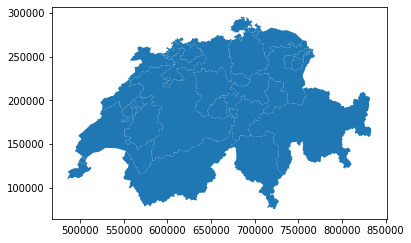

In [2]:
data.plot()

In [3]:
matplotlib inline

<AxesSubplot:>

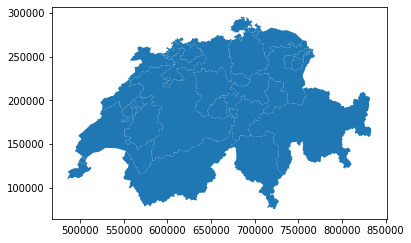

In [4]:
data.plot()

### Basic exploration and navigation

In [5]:
data.head(1)

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,OBJEKTART,REVISION_Q,ICC,KANTONSNUM,SEE_FLAECH,KANTONSFLA,KT_TEIL,NAME,EINWOHNERZ,geometry
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,Kanton,2018_Aufbau,CH,18,NaN,710530.0,0,Graubünden,197888.0,"POLYGON Z ((709776.070 185645.951 3062.876, 70..."


In [6]:
print(data['geometry'].head(1).exterior)

0    LINEARRING Z (709776.070 185645.951 3062.876, ...
dtype: geometry


In [7]:
data['geometry'].head(1).area

0    7.105217e+09
dtype: float64

### Filters and iterations

Select data where the name corresponds to the canton of Vaud

In [9]:
selection=data.loc[data['NAME']=='Vaud']
selection


,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,OBJEKTART,REVISION_Q,ICC,KANTONSNUM,SEE_FLAECH,KANTONSFLA,KT_TEIL,NAME,EINWOHNERZ,geometry
3,{921DFEF2-6D91-4CB8-9CFC-2A831C412020},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,Kanton,2018_Aufbau,CH,22,39097.0,321201.0,1,Vaud,793129.0,"POLYGON Z ((549756.794 189303.160 429.247, 548..."
26,{DAD81A01-85E7-4FFC-B0C9-B2359730300E},2015-12-08,2012-10-26,2012,10,2019,1,Verbessert,AV,2015,...,Kanton,2018_Aufbau,CH,22,NaN,NaN,2,Vaud,NaN,"POLYGON Z ((569696.161 203238.821 428.943, 569..."


In [10]:
for idx,row in selection.iterrows():
    area=row['geometry'].area
    print("The geometry area at {0} is {1}".format(idx,area))

The geometry area at 3 is 3118536618.903036
The geometry area at 26 is 93463290.32157156


<AxesSubplot:>

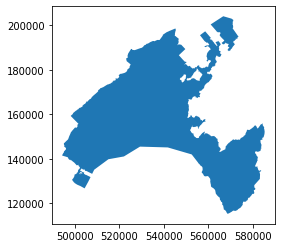

In [11]:
selection.plot()

<AxesSubplot:>

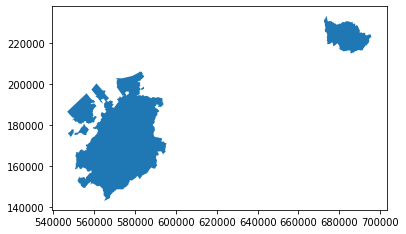

In [12]:
zugAndFribourg=data.loc[(data['NAME']=='Zug') | (data['NAME']=='Fribourg')]
zugAndFribourg.plot()

In [15]:

for idx,row in zugAndFribourg.iterrows():
    dist=row['geometry'].distance(data.loc[6]['geometry'])
    print("distance from {0} to {1} is {2}".format(data.loc[8]['NAME'],row['NAME'],dist))

distance from Luzern to Fribourg is 89285.81765415004
distance from Luzern to Zug is 0.0
distance from Luzern to Fribourg is 120366.3759727847
distance from Luzern to Fribourg is 128313.15985575122
distance from Luzern to Fribourg is 135083.44823267878
distance from Luzern to Fribourg is 95400.12430371482
distance from Luzern to Fribourg is 118589.42796294784


In [14]:
for idx,row in zugAndFribourg.iterrows():
    dist=row['geometry'].centroid.distance(data.loc[6]['geometry'].centroid)
    print("distance from {0} to {1} is {2}".format(data.loc[8]['NAME'],row['NAME'],dist))

distance from Luzern to Fribourg is 141967.4230203907
distance from Luzern to Zug is 29767.045955095706
distance from Luzern to Fribourg is 151613.55850258234
distance from Luzern to Fribourg is 156247.23860257282
distance from Luzern to Fribourg is 161859.94375018188
distance from Luzern to Fribourg is 120833.9616898067
distance from Luzern to Fribourg is 143423.81018197164


### Creating a new GeoDataFrame

In [17]:
newData=gpd.GeoDataFrame()
newData['geometry']=None

data['center']=None

data

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,REVISION_Q,ICC,KANTONSNUM,SEE_FLAECH,KANTONSFLA,KT_TEIL,NAME,EINWOHNERZ,geometry,center
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,18,NaN,710530.0,0,Graubünden,197888.0,"POLYGON Z ((709776.070 185645.951 3062.876, 70...",None
1,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,2,11897.0,595952.0,1,Bern,1031126.0,"POLYGON Z ((578309.919 203952.588 433.298, 578...",None
2,{54B25E50-30A7-4995-ADE3-5FFF6E13A995},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,23,1060.0,522463.0,0,Valais,341463.0,"POLYGON Z ((679715.071 153452.154 3024.435, 67...",None
3,{921DFEF2-6D91-4CB8-9CFC-2A831C412020},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,22,39097.0,321201.0,1,Vaud,793129.0,"POLYGON Z ((549756.794 189303.160 429.247, 548...",None
4,{95F10F52-8B2F-4D6A-AF7E-D4F915E42F89},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,21,7147.0,281216.0,0,Ticino,353709.0,"POLYGON Z ((679715.071 153452.154 3024.435, 67...",None
5,{05D55405-466B-4ECC-83C7-A906DEB0D607},2017-12-04,2012-10-26,2012,10,2019,1,Verbessert,swisstopo,2018,...,2018_Aufbau,CH,17,7720.0,202820.0,1,St. Gallen,504686.0,"POLYGON Z ((703762.510 230811.819 405.830, 702...",None
6,{FB7105B8-6D7C-4787-846E-17B2BC145C6E},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,1,6811.0,172894.0,0,Zürich,1504346.0,"POLYGON Z ((673540.901 233506.000 386.550, 673...",None
7,{B01E1FB4-9A9B-48AC-BCA3-7D6D93BA23F3},2015-12-09,2012-10-26,2012,10,2019,1,Verbessert,AV,2015,...,2018_Aufbau,CH,10,7818.0,167142.0,1,Fribourg,315074.0,"POLYGON Z ((569696.161 203238.821 428.943, 569...",None
8,{A7C284E4-45C4-44E2-ABAF-D1A0EAB10397},2016-12-09,2012-10-26,2012,10,2019,1,Verbessert,swisstopo,2017,...,2018_Aufbau,CH,3,6438.0,149352.0,0,Luzern,406506.0,"POLYGON Z ((678305.000 205565.000 433.540, 678...",None
9,{E11CD2CA-2E2D-415C-8789-C10D7C26E441},2016-12-09,2012-10-26,2012,10,2019,1,Verbessert,swisstopo,2017,...,2018_Aufbau,CH,19,870.0,140380.0,1,Aargau,670988.0,"POLYGON Z ((673540.901 233506.000 386.550, 673...",None


In [19]:
for idx,row in data.iterrows():
    center=row['geometry'].centroid
    data.loc[idx,'center']=center
    
data

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,REVISION_Q,ICC,KANTONSNUM,SEE_FLAECH,KANTONSFLA,KT_TEIL,NAME,EINWOHNERZ,geometry,center
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,18,NaN,710530.0,0,Graubünden,197888.0,"POLYGON Z ((709776.070 185645.951 3062.876, 70...",POINT (767575.0244501946 169561.5515886946)
1,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,2,11897.0,595952.0,1,Bern,1031126.0,"POLYGON Z ((578309.919 203952.588 433.298, 578...",POINT (614277.2987648115 185601.5741448295)
2,{54B25E50-30A7-4995-ADE3-5FFF6E13A995},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,23,1060.0,522463.0,0,Valais,341463.0,"POLYGON Z ((679715.071 153452.154 3024.435, 67...",POINT (612816.6401953455 117581.908002399)
3,{921DFEF2-6D91-4CB8-9CFC-2A831C412020},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,22,39097.0,321201.0,1,Vaud,793129.0,"POLYGON Z ((549756.794 189303.160 429.247, 548...",POINT (539303.7917365739 156760.3369243431)
4,{95F10F52-8B2F-4D6A-AF7E-D4F915E42F89},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,21,7147.0,281216.0,0,Ticino,353709.0,"POLYGON Z ((679715.071 153452.154 3024.435, 67...",POINT (705582.446308137 128055.1089343966)
5,{05D55405-466B-4ECC-83C7-A906DEB0D607},2017-12-04,2012-10-26,2012,10,2019,1,Verbessert,swisstopo,2018,...,2018_Aufbau,CH,17,7720.0,202820.0,1,St. Gallen,504686.0,"POLYGON Z ((703762.510 230811.819 405.830, 702...",POINT (739058.4421031841 233039.9063328989)
6,{FB7105B8-6D7C-4787-846E-17B2BC145C6E},2018-11-22,2012-10-26,2012,10,2019,1,Verbessert,AV,2019,...,2018_Aufbau,CH,1,6811.0,172894.0,0,Zürich,1504346.0,"POLYGON Z ((673540.901 233506.000 386.550, 673...",POINT (691804.3897484293 252035.1222239229)
7,{B01E1FB4-9A9B-48AC-BCA3-7D6D93BA23F3},2015-12-09,2012-10-26,2012,10,2019,1,Verbessert,AV,2015,...,2018_Aufbau,CH,10,7818.0,167142.0,1,Fribourg,315074.0,"POLYGON Z ((569696.161 203238.821 428.943, 569...",POINT (573827.5419753399 173065.4281091813)
8,{A7C284E4-45C4-44E2-ABAF-D1A0EAB10397},2016-12-09,2012-10-26,2012,10,2019,1,Verbessert,swisstopo,2017,...,2018_Aufbau,CH,3,6438.0,149352.0,0,Luzern,406506.0,"POLYGON Z ((678305.000 205565.000 433.540, 678...",POINT (651010.0992641809 213189.1664508271)
9,{E11CD2CA-2E2D-415C-8789-C10D7C26E441},2016-12-09,2012-10-26,2012,10,2019,1,Verbessert,swisstopo,2017,...,2018_Aufbau,CH,19,870.0,140380.0,1,Aargau,670988.0,"POLYGON Z ((673540.901 233506.000 386.550, 673...",POINT (654217.6257056012 251244.1736071813)


In [20]:
df=gpd.GeoDataFrame(data['center'])
df
conversion={'center':'geometry'}
df.rename(columns=conversion)

,geometry
0,POINT (767575.0244501946 169561.5515886946)
1,POINT (614277.2987648115 185601.5741448295)
2,POINT (612816.6401953455 117581.908002399)
3,POINT (539303.7917365739 156760.3369243431)
4,POINT (705582.446308137 128055.1089343966)
5,POINT (739058.4421031841 233039.9063328989)
6,POINT (691804.3897484293 252035.1222239229)
7,POINT (573827.5419753399 173065.4281091813)
8,POINT (651010.0992641809 213189.1664508271)
9,POINT (654217.6257056012 251244.1736071813)


### Changing coordinate reference system

In [21]:
df.crs=data.crs

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  """Entry point for launching an IPython kernel.


In [22]:
df.crs

<Projected CRS: EPSG:21781>
Name: CH1903 / LV03
Axis Info [cartesian]:
- Y[east]: Easting (metre)
- X[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1903M
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [23]:
df=df.set_geometry('center')

<AxesSubplot:>

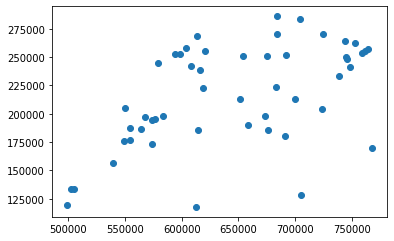

In [24]:
df.plot()

### Exporting as SHP file

In [25]:
df.to_file('swissCenters.shp')